In [71]:
# installing libraries for use within the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# we will use pandas profiling for a full scale analysis of our dataset
import seaborn as sns

In [72]:
# read_csv from pandas is used to read the csv dataset
data = pd.read_csv('train.csv')

In [73]:
# we use DataFrame method in pandas to convert our dataset into pandas data frame for a better viewing and understanding of our data
traindata = pd.DataFrame(data)

In [74]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2870 non-null   int64  
 1   region               2870 non-null   object 
 2   latitude             2870 non-null   float64
 3   longitude            2870 non-null   float64
 4   accommodation_type   2870 non-null   object 
 5   cost                 2870 non-null   int64  
 6   minimum_nights       2870 non-null   int64  
 7   number_of_reviews    2870 non-null   int64  
 8   reviews_per_month    2194 non-null   float64
 9   owner_id             2870 non-null   int64  
 10  owned_hotels         2870 non-null   int64  
 11  yearly_availability  2870 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


In [75]:
# as we can see above in the 'reviews_per_month' column we have some values which are not 'non-null' and we have
# two categorical columns. We need to take care of these missing values and also convert categorical data to numerical data

In [76]:
traindata.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [77]:
traindata.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692463,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [78]:
# for a much better understanding of our dataset we will use the package pandas_profiling

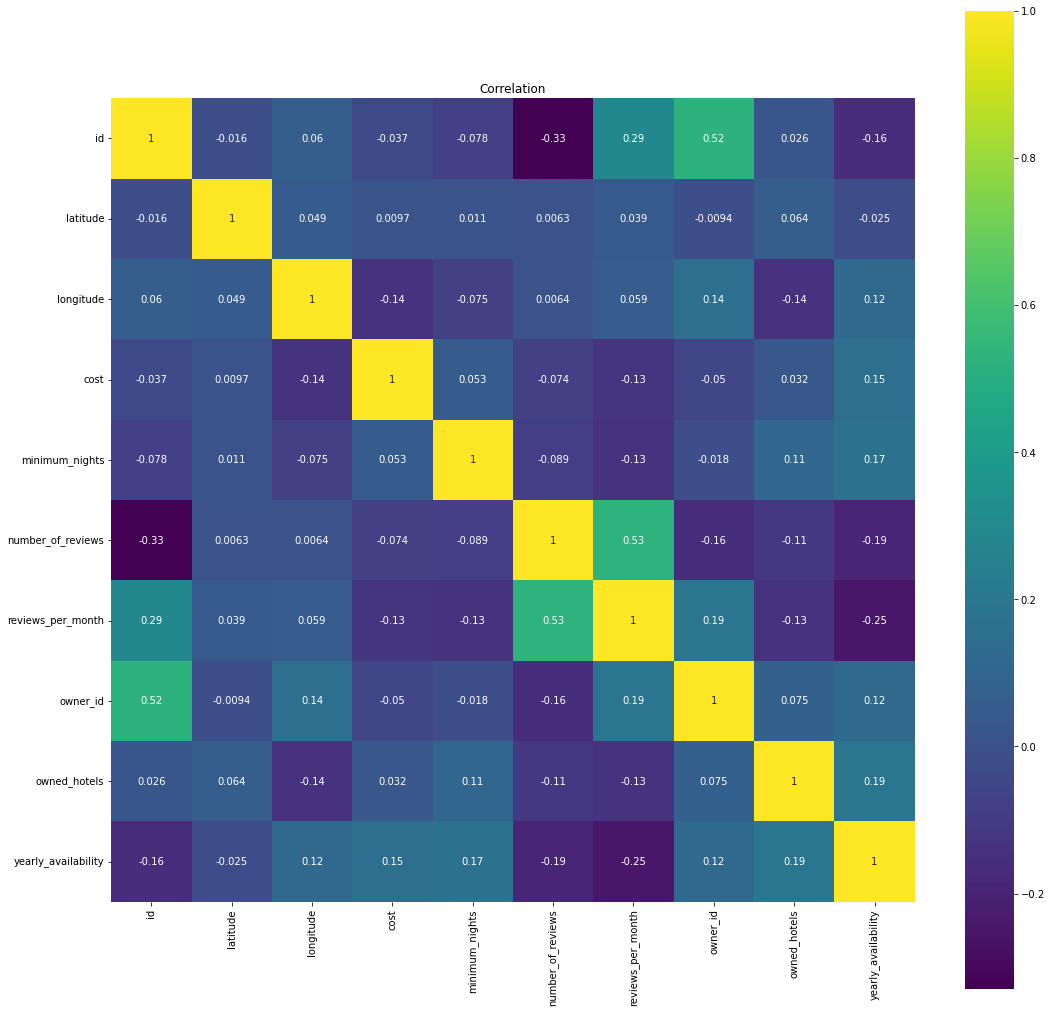

In [79]:
# for a better depiction of correlation between features
correlation = traindata.corr()
plt.figure(figsize=(18,18))
sns.heatmap(correlation, vmax=1, square = True, annot=True, cmap='viridis')
plt.title('Correlation')
plt.savefig("correlation.png")

In [80]:
# we see that correlation heatmap does not offer any good insight into which feautures affect yearly_availability

In [81]:
# we use get_dummies method in pandas to convert region and accomodation column of the dataset from type:object to type:numerical
# it is easier to work with numerical data as compared to categorical data

In [82]:
traindata = pd.get_dummies(traindata, columns=['region','accommodation_type'])

In [83]:
traindata.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,0,0,1,0,0,1,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,0,0,1,0,0,0,1,0,0
2,19091,40.78573,-73.81062,85,1,0,NaN,19923341,1,1,0,0,0,1,0,0,1,0
3,34305,40.73863,-73.98002,210,30,0,NaN,200380610,65,1,0,0,1,0,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,1,0,0,1,0,0,0,0,1


In [84]:
traindata.dtypes # as we can see there is no categorical data in the dataset now

id                                      int64
latitude                              float64
longitude                             float64
cost                                    int64
minimum_nights                          int64
number_of_reviews                       int64
reviews_per_month                     float64
owner_id                                int64
owned_hotels                            int64
yearly_availability                     int64
region_Bronx                            uint8
region_Brooklyn                         uint8
region_Manhattan                        uint8
region_Queens                           uint8
region_Staten Island                    uint8
accommodation_type_Entire home/apt      uint8
accommodation_type_Private room         uint8
accommodation_type_Shared room          uint8
dtype: object

## Data Imputation

In [85]:
# We can see below that the reviews_per_month has 676 missing values. To take care 
# of these missing values we use MICE(Multiple Imputations by Chained Equation) algorithm to predict the missing values. 
# We are using Linear Regresssion model to predict the values in our MICE Algorithm

In [86]:
print(traindata.isnull().sum())

id                                      0
latitude                                0
longitude                               0
cost                                    0
minimum_nights                          0
number_of_reviews                       0
reviews_per_month                     676
owner_id                                0
owned_hotels                            0
yearly_availability                     0
region_Bronx                            0
region_Brooklyn                         0
region_Manhattan                        0
region_Queens                           0
region_Staten Island                    0
accommodation_type_Entire home/apt      0
accommodation_type_Private room         0
accommodation_type_Shared room          0
dtype: int64


In [87]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [88]:
lr=LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)

In [89]:
traindata_imputed=imp.fit_transform(traindata)

[IterativeImputer] Completing matrix with shape (2870, 18)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.09
[IterativeImputer] Change: 2.019535004232412, scaled tolerance: 273812.306 
[IterativeImputer] Early stopping criterion reached.


In [90]:
type(traindata_imputed)               # we see that the type of our imputed dataset is numpy. To better use pandas function and better visualization
                                      # we convert it to pandas dataframe

numpy.ndarray

In [91]:
traindata_imputed = pd.DataFrame(traindata_imputed)
type(traindata_imputed)

pandas.core.frame.DataFrame

In [92]:
print(traindata_imputed.isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64


In [93]:
traindata_imputed.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,13232.0,40.71854,-74.00439,170.0,5.0,7.0,0.560000,929983.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,246.0,40.64446,-73.95030,65.0,3.0,238.0,2.300000,281764.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,19091.0,40.78573,-73.81062,85.0,1.0,0.0,0.326637,19923341.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,34305.0,40.73863,-73.98002,210.0,30.0,0.0,0.872628,200380610.0,65.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,444.0,40.82426,-73.94630,75.0,3.0,38.0,0.420000,745069.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [94]:
# the column names were reset so to get it back we use the below code
traindata_imputed.columns =['id','latitude','longitude','cost','minimum_nights','number_of_reviews','reviews_per_month','owner_id','owned_hotels','yearly_availability','region_Bronx','region_Brooklyn','region_Manhattan','region_Queens','region_StatenIsland','accommodation_type_Entire home/apt','accommodation_type_Private room','accommodation_type_Shared room']

In [95]:
traindata_imputed.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_StatenIsland,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,13232.0,40.71854,-74.00439,170.0,5.0,7.0,0.560000,929983.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,246.0,40.64446,-73.95030,65.0,3.0,238.0,2.300000,281764.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,19091.0,40.78573,-73.81062,85.0,1.0,0.0,0.326637,19923341.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,34305.0,40.73863,-73.98002,210.0,30.0,0.0,0.872628,200380610.0,65.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,444.0,40.82426,-73.94630,75.0,3.0,38.0,0.420000,745069.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [96]:
# # Visualization, Modeling, Machine Learning

# #Build a model that categorizes hotels on the basis of their yearly availability. Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate


# *  **Build and optimized model that effectively solves the business problem** 
# *  **The model will be evaluated on the basis of Accuracy**
# *  **Read the test.csv file and prepare features for testing**


## Feature Selection

In [97]:
#splicing the dataset into input(consisting of only input features) dataframe and target('yearly_availability') dataframe
xtrain= traindata_imputed.loc[:, traindata_imputed.columns != 'yearly_availability']
ytrain = traindata_imputed.loc[:, traindata_imputed.columns == 'yearly_availability']

In [98]:
type(xtrain)

pandas.core.frame.DataFrame

In [99]:
# we will scale our dataset using a standard scaler for later use in our ML models
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
xtrain= scaler.fit_transform(xtrain)
xtrain_pd = pd.DataFrame(xtrain)
xtrain_pd.columns =['id','latitude','longitude','cost','minimum_nights','number_of_reviews','reviews_per_month','owner_id','owned_hotels','region_Bronx','region_Brooklyn','region_Manhattan','region_Queens','region_StatenIsland','accommodation_type_Entire home/apt','accommodation_type_Private room','accommodation_type_Shared room']
xtrain_pd.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,region_Bronx,region_Brooklyn,region_Manhattan,region_Queens,region_StatenIsland,accommodation_type_Entire home/apt,accommodation_type_Private room,accommodation_type_Shared room
0,-0.956869,-0.230897,-1.090408,-0.063882,-0.172006,-0.286837,-0.421698,-0.880384,-0.273479,-0.167144,-0.773877,1.073796,-0.384708,-0.070014,1.365383,-0.862949,-0.537335
1,-1.875356,-1.579468,-0.002863,-0.322430,-0.224685,6.826094,0.975021,-0.888411,-0.273479,-0.167144,1.292195,-0.931275,-0.384708,-0.070014,1.365383,-0.862949,-0.537335
2,-0.542467,0.992246,2.805573,-0.273182,-0.277364,-0.502380,-0.609022,-0.645175,-0.273479,-0.167144,-0.773877,-0.931275,2.599376,-0.070014,-0.732395,1.158817,-0.537335
3,0.533604,0.134826,-0.600420,0.034613,0.486483,-0.502380,-0.170748,1.589560,2.088075,-0.167144,-0.773877,1.073796,-0.384708,-0.070014,-0.732395,1.158817,-0.537335
4,-1.861352,1.693655,0.077562,-0.297806,-0.224685,0.667712,-0.534078,-0.882674,-0.199680,-0.167144,-0.773877,1.073796,-0.384708,-0.070014,-0.732395,-0.862949,1.861035


[0.06032647 0.03584265 0.03685931 0.03414906 0.03664109 0.05679003
 0.04515392 0.04136788 0.09582185 0.00553117 0.00487953 0.0062629
 0.0061008  0.00034013 0.22870542 0.25712034 0.04810743]


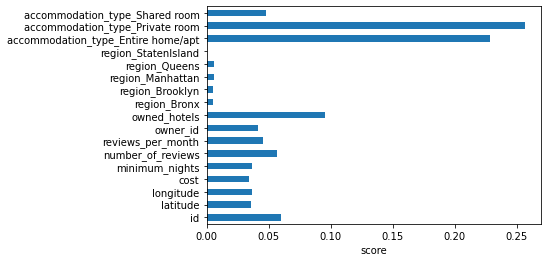

In [101]:
# we will be using Extra Trees Classifier to find a score of the features for their contribution towards our output variable('yearly_availability')
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(xtrain,ytrain.values.ravel())
print((model.feature_importances_)) #using inbuilt class feature_importances of tree based classifiers
#plotting graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=xtrain_pd.columns)
feat_importances.plot(kind='barh')
plt.xlabel('score')
plt.show()

In [102]:
# as we can see the region_statenIsland, region_Queens, region_Manhattan, region_Brooklyn, region_Bronx least contribute to the output. 

## Training our Dataset

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, stratify=ytrain, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2296, 17) (2296, 1)
(574, 17) (574, 1)


In [104]:
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/billy/temp_env/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/billy/temp_env/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, preds)
print(accuracy * 100.0)

## Predicting Values

In [ ]:
# now running our model on final 'test' dataset to predict values of 'yearly availability'
# but before we pass our test dataset through our trained model, we preprocess it like our train dataset, so that it can be processed by our model

In [ ]:
testdata = pd.read_csv('test.csv')

In [ ]:
testdata.head()

In [ ]:
print(testdata.isnull().sum()) # we have 173 missing values in 'reviews_per_month' column

In [ ]:
testdata.info()

In [ ]:
testdata = pd.get_dummies(testdata, columns=['region','accommodation_type']) # one hot encoding to convert the categorical columns into numerical

In [ ]:
testdata=imp.fit_transform(testdata) # imputing the missing values with our pre-trained mice algorithm imputer above

In [ ]:
type(testdata)  # we convert the data in pandas dataframe

In [ ]:
testdata= pd.DataFrame(testdata)

In [ ]:
# renaming the testdata columns 
testdata.columns =['id','latitude','longitude','cost','minimum_nights','number_of_reviews','reviews_per_month','owner_id','owned_hotels','region_Bronx','region_Brooklyn','region_Manhattan','region_Queens','region_StatenIsland','accommodation_type_Entire home/apt','accommodation_type_Private room','accommodation_type_Shared room']                 

In [ ]:
testdata.shape

In [ ]:
xtest = testdata.loc[:,testdata.columns != 'yearly_availability']

In [ ]:
# predicting the result for test data 
preds_result = xgb_cl.predict(xtest)


In [ ]:
submission_df = pd.DataFrame(data={"id":testdata["id"],"yearly_availability":preds_result})

In [ ]:
submission_df.describe()

In [ ]:
submission_df.head()

In [ ]:
submission_df.to_csv('submisssions.csv', index=False)